<a href="https://colab.research.google.com/github/Sandramcrs08/modelos_classificacao/blob/main/modelos_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge: Modelos de Classificação

###Squad Marie Curie

###Classificação de Doenças Cardíacas

> Contexto <br>

O conjunto de dados é o conjunto de dados Statlog Heart Disease obtido do repositório UCI. O conjunto de dados consiste em dados de 270 indivíduos. Existem 14 colunas no conjunto de dados (que foram extraídas de um conjunto maior de 75). Sem valores ausentes. A tarefa de classificação é prever se um indivíduo sofre de doença cardíaca ou não. (0: ausência, 1: presença)

Este é um estudo importante porque a saúde é um ponto vital de pesquisa para melhor ajudar os pacientes com certas condições. Além disso, a pressão arterial geralmente não apresenta sintomas e, no entanto, se a pressão alta não for tratada, pode ser um grande contribuinte para condições de saúde mais graves, como um derrame ou ataque cardíaco [2].

> Dicionário de dados <br>

Este banco de dados contém 13 atributos e uma variável de destino. Possui 8 valores nominais e 5 valores numéricos. A descrição detalhada de todos esses recursos é a seguinte:<br>
<br>

● **Age:** idade dos pacientes em anos<br>
● **Sex:** (Masculino: 1; Feminino: 0)<br>
● **cp:** Tipo de dor torácica sentida pelo paciente. Este termo é categorizado em 4 categorias:<br>
_0 angina típica,<br>
_1 angina atípica,<br>
_2 dor não anginosa,<br>
_3 assintomática<br>
● **trestbps:** nível de pressão arterial do paciente no modo de repouso em mm/HG<br>
● **chol:** colesterol sérico em mg/dl<br>
● **fbs:** Níveis de açúcar no sangue em jejum > 120 mg/dl representa 1 em caso de verdadeiro e 0 como falso (Nominal)<br>
● **restecg:** O resultado do eletrocardiograma em repouso é representado em 3 valores distintos:<br>
_0: Normal<br>
_1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV)<br>
_2: mostrando provável ou definitiva hipertrofia ventricular esquerda por Critérios de Estes<br>
● **thalach:** frequência cardíaca máxima alcançada<br>
● **exang:** Angina induzida pelo exercício:<br>
_0 retratando Não<br>
_1 retratando Sim<br>
● **oldpeak:** Depressão do ST induzida pelo exercício em relação ao estado de repouso<br>
● **slope:** segmento ST medido em termos de inclinação durante o pico do exercício:<br>
_0: inclinação ascendente;<br>
_1: plano;<br>
_2: inclinação descendente<br>
● **ca:** O número de vasos principais (0–3) (nominal)<br>
● **thal:** Um distúrbio sanguíneo chamado talassemia: <br>
_0: NULO<br>
_1: fluxo sanguíneo normal<br>
_2: defeito fixo (sem fluxo sanguíneo em alguma parte do coração)<br>
_3: defeito reversível (um fluxo sanguíneo é observado, mas não é normal (nominal)<br>
● **target:** É a variável alvo que temos que prever 1 significa que o paciente sofre de doença cardíaca e 0 significa que o paciente é normal.

In [ ]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Heart_disease_statlog.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,2,172,199,1,0,162,0,0.5,0,0,3,0
266,44,1,1,120,263,0,0,173,0,0.0,0,0,3,0
267,56,0,1,140,294,0,2,153,0,1.3,1,0,1,0
268,57,1,3,140,192,0,0,148,0,0.4,1,0,2,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


###Perguntas:

1- Entenda faça uma análise exploratória dos dados observando as principais variáveis e a sua relação com a target.

In [ ]:
# Grazielle e Juliana

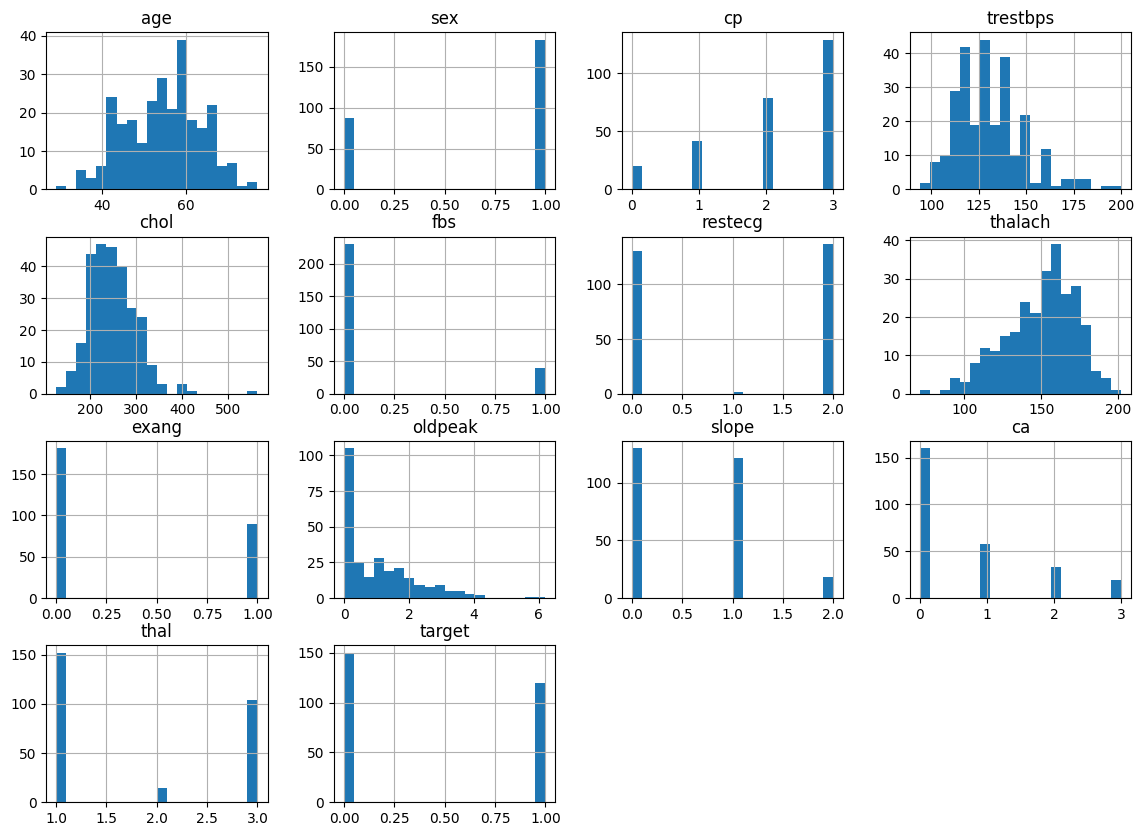

In [ ]:
# Distribuição das variáveis numéricas
df.hist(bins=20, figsize=(14, 10))
plt.show()

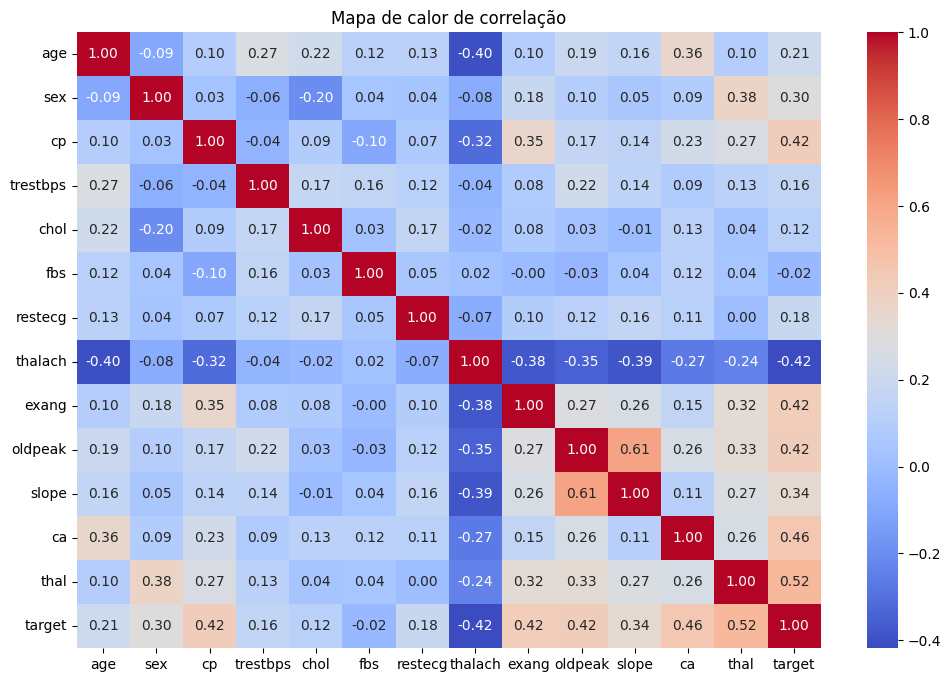

In [ ]:
# Mapa de calor para correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Mapa de calor de correlação')
plt.show()

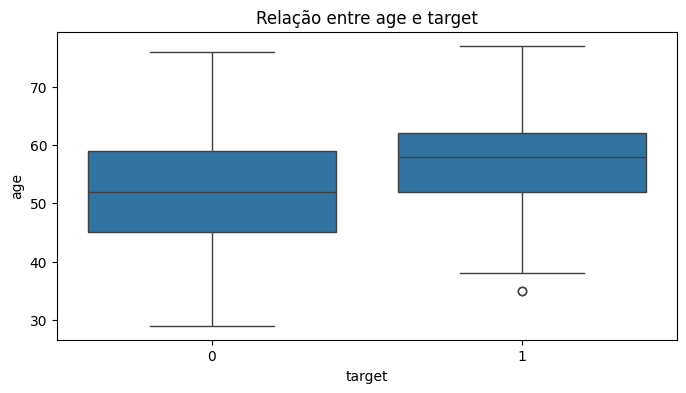

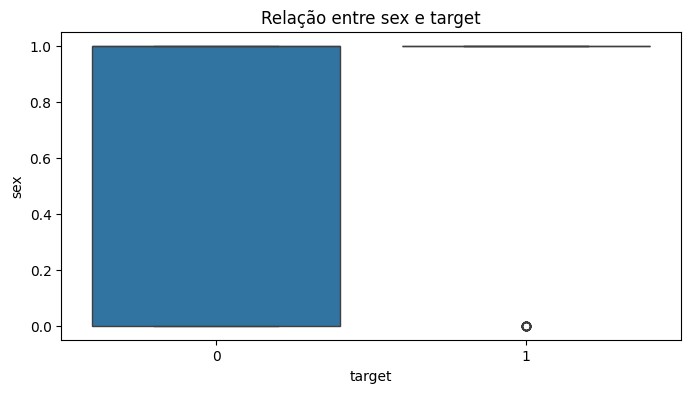

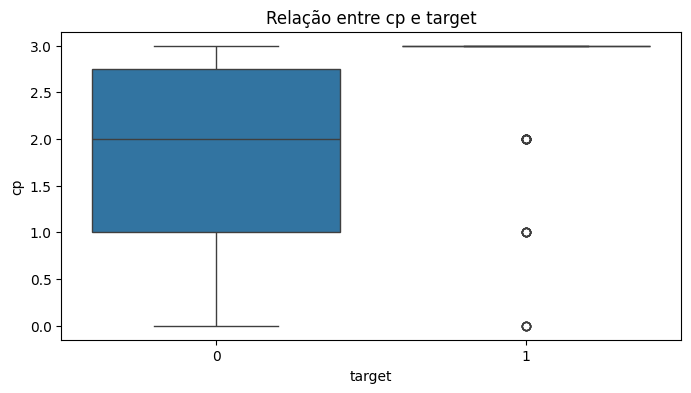

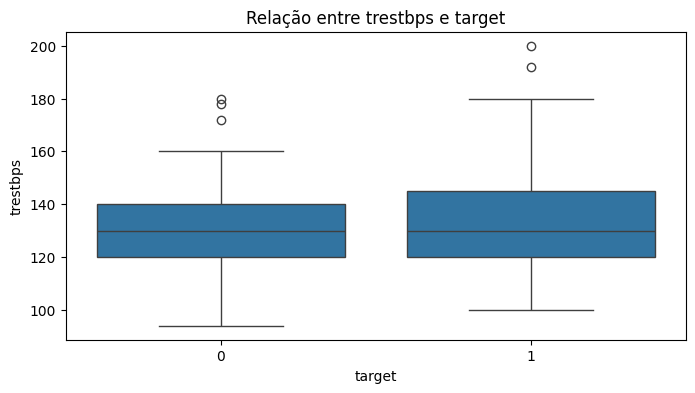

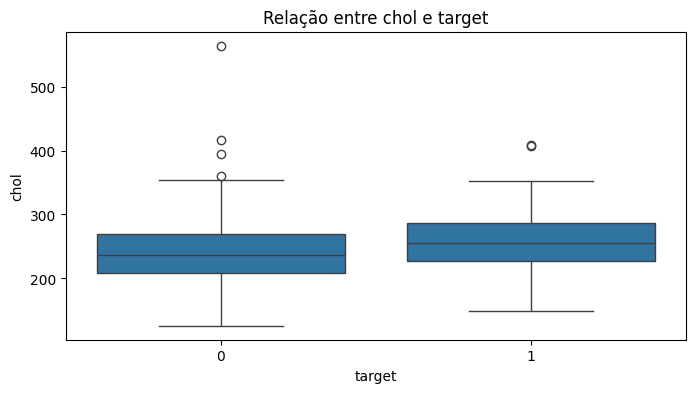

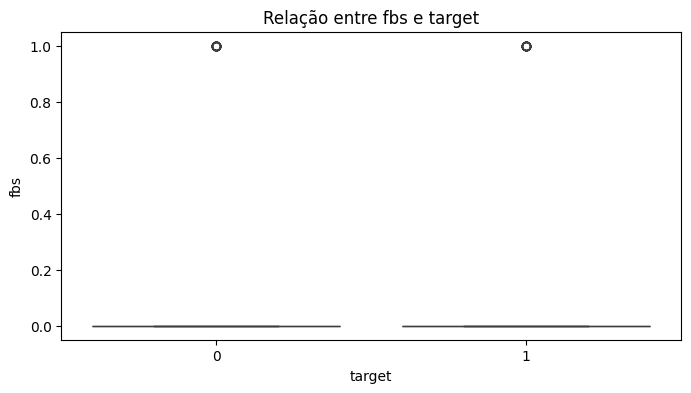

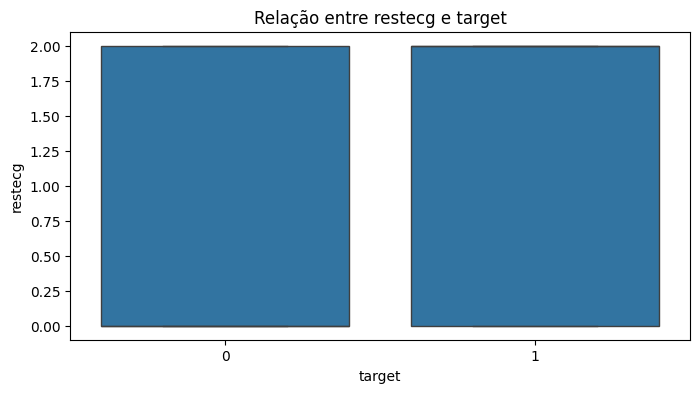

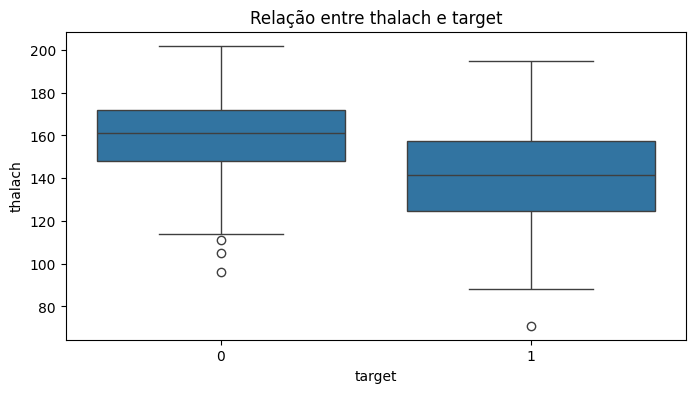

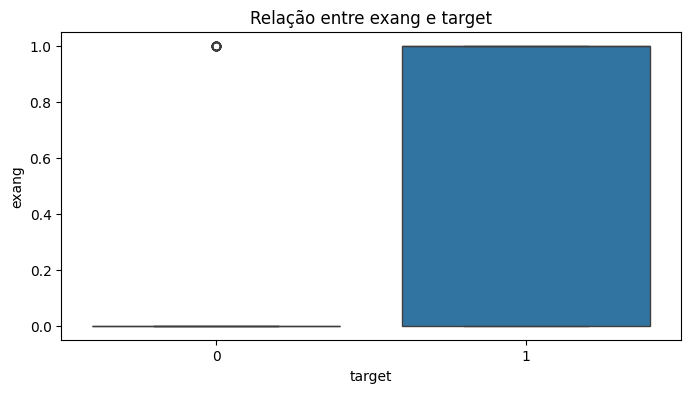

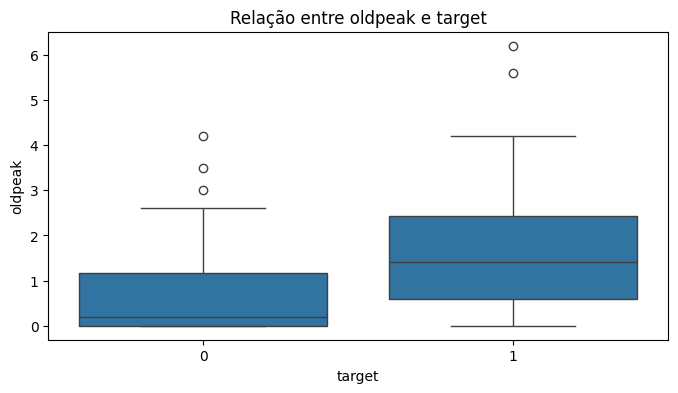

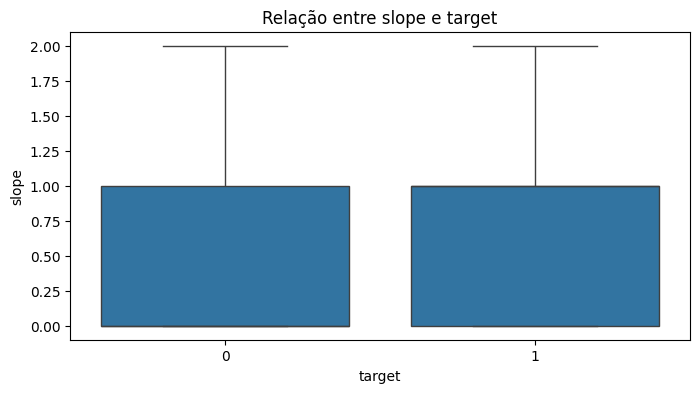

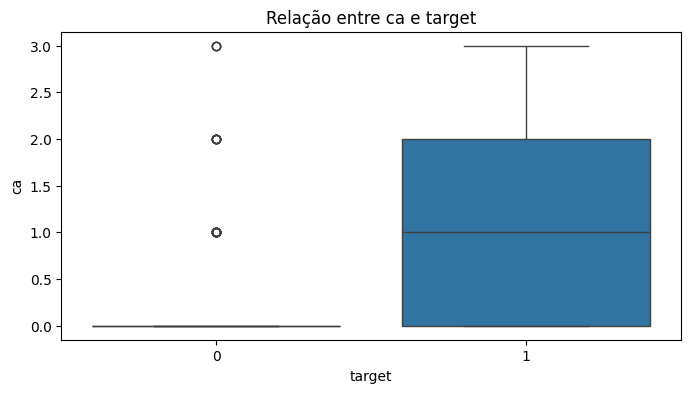

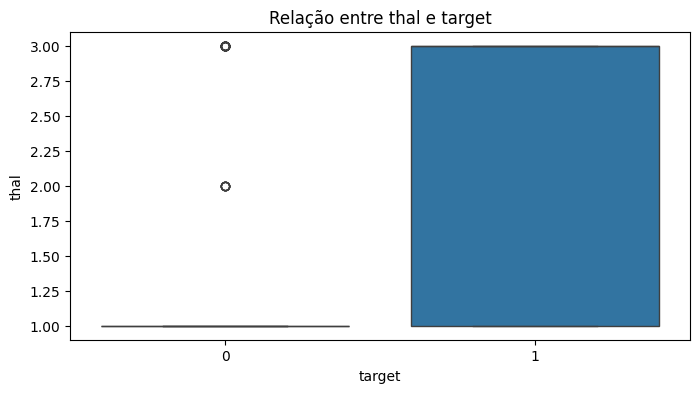

In [ ]:
# Relação entre variáveis numéricas e a variável alvo
for column in df.columns:
    if df[column].dtype != 'object' and column != 'target':
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='target', y=column, data=df)
        plt.title(f'Relação entre {column} e target')
        plt.show()

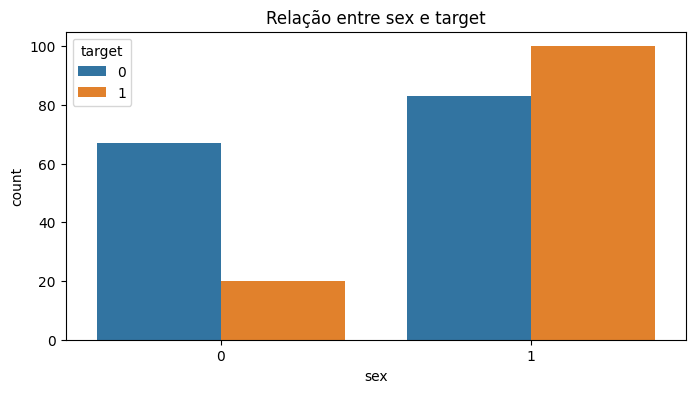

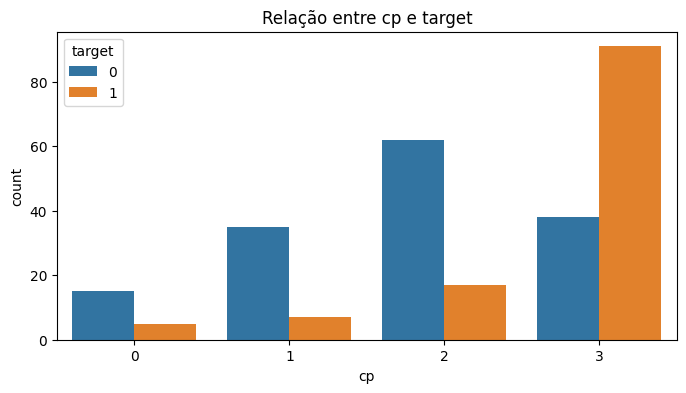

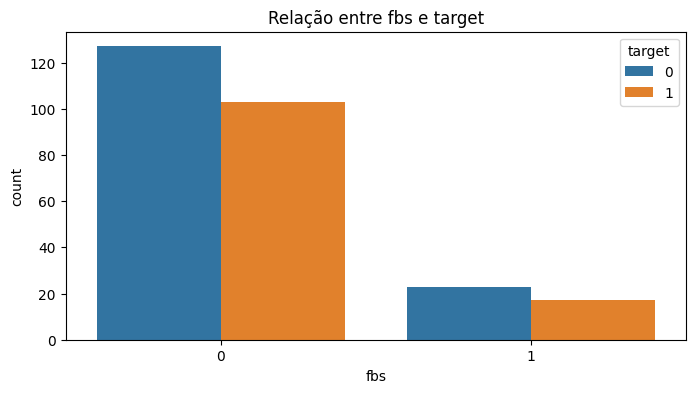

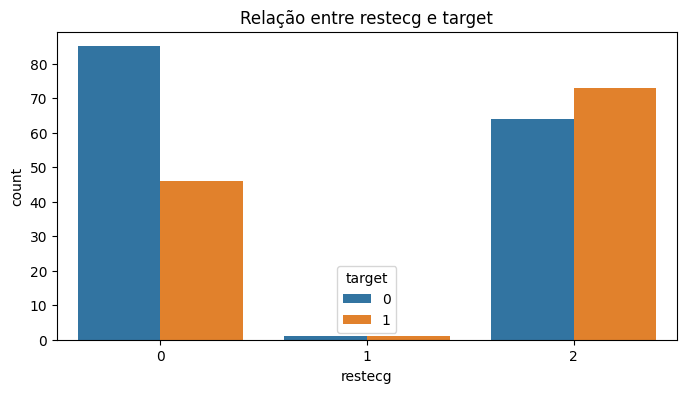

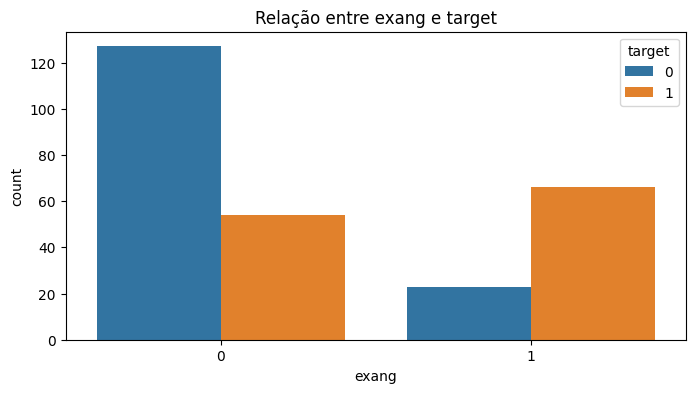

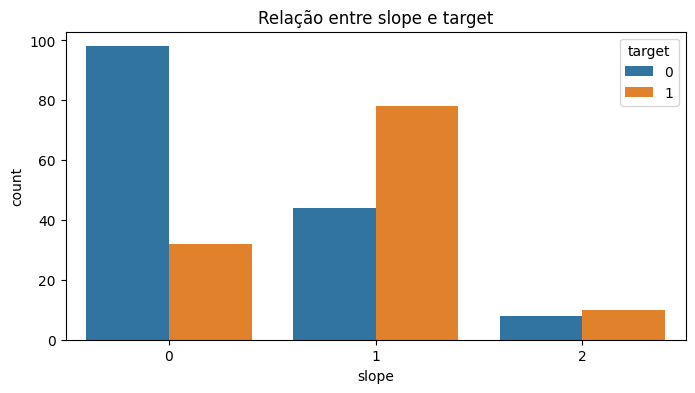

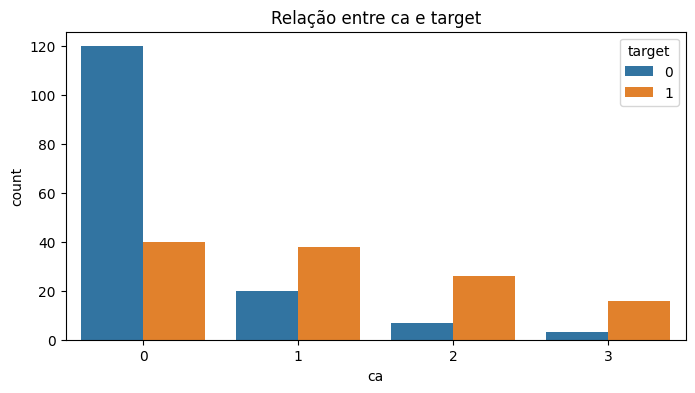

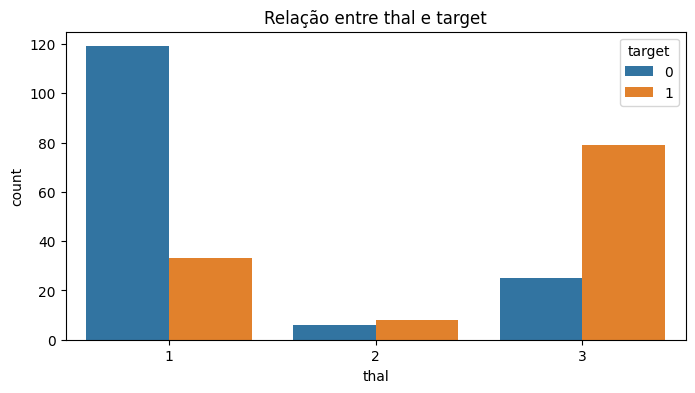

In [ ]:
# Convertendo colunas que devem ser categóricas
colunas_categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for coluna in colunas_categoricas:
    df[coluna] = df[coluna].astype('category')

# Define categorical_columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Relação entre variáveis categóricas e a variável alvo
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, hue='target', data=df)
    plt.title(f'Relação entre {column} e target')
    plt.show()

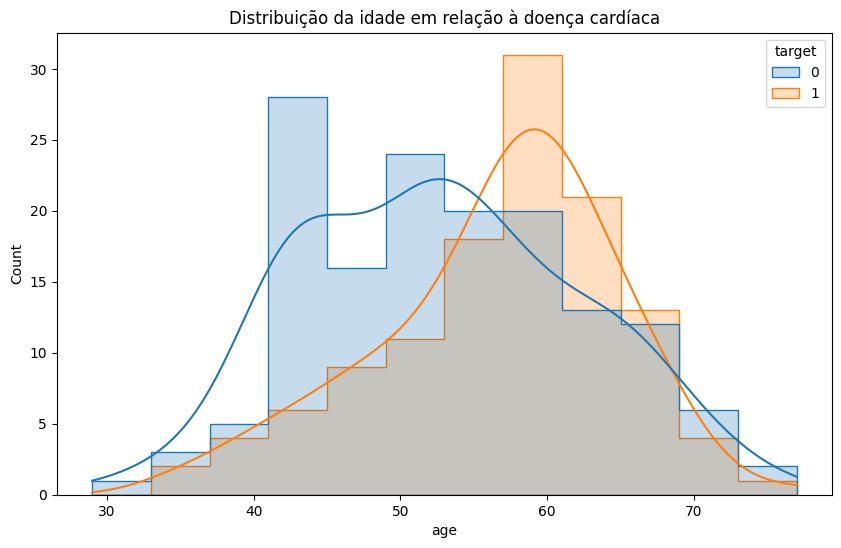

In [ ]:
#Relações entre variáveis específicas e a variável alvo.
#Idade e Doença Cardíaca

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, element='step')
plt.title('Distribuição da idade em relação à doença cardíaca')
plt.show()

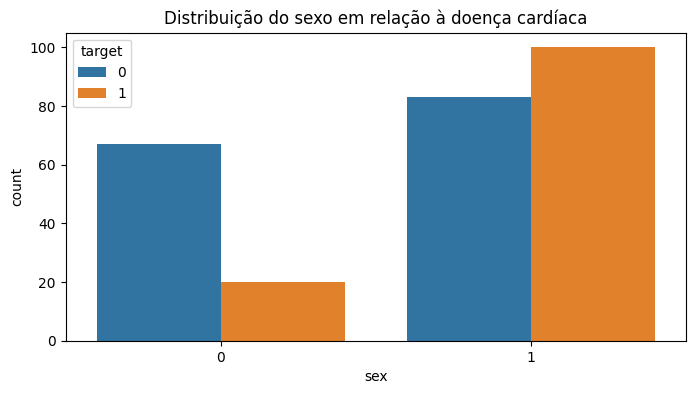

In [ ]:
#Sexo e Doença Cardíaca
plt.figure(figsize=(8, 4))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Distribuição do sexo em relação à doença cardíaca')
plt.show()

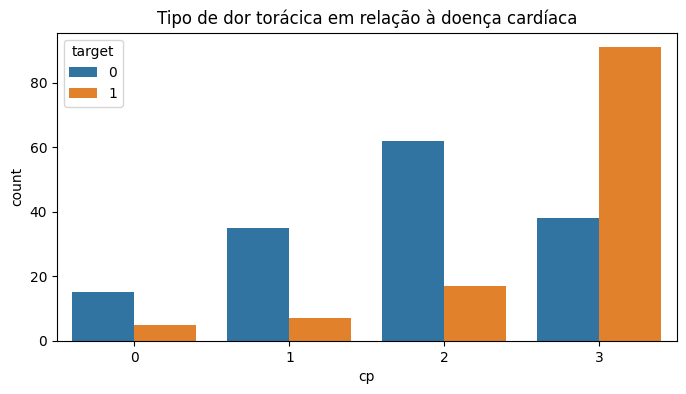

In [ ]:
#Tipo de dor torácica (cp) e Doença Cardíaca
plt.figure(figsize=(8, 4))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Tipo de dor torácica em relação à doença cardíaca')
plt.show()

2 - Construa um modelo de regressão logística para classificar se o indivíduo sofre doença cardíaca ou não

In [ ]:
# Barbara e Leli

In [ ]:
#separando a variável dependente das variáveis independentes
X = df.drop(columns=['target'])
Y = df['target']

#dividir o conjunto de dados entre treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

#criar o modelo de regressão logistica
modelo = LogisticRegression() #instanciando um objeto da classe LogisticRegression
modelo.fit(X_train, Y_train) #treinando o objeto

#fazer a previsões no conjunto de teste
previsoes = modelo.predict(X_test)

#calcular a acurácia do modelo
#acuracia é a a proporção de previsões corretas, verdadeiros positivos e verdadeiros negativos, entre o total de previsões.
acuracia = accuracy_score(Y_test, previsoes)
print(f'A acurácia do modelo é: {acuracia}.')

#calcular a Precisão
#precisão é a proporção de verdadeiros positivos, entre os exemplos previstos como positivos.
precisao = precision_score(Y_test, previsoes)
print(f'A precisão do modelo é {precisao}.')

#calcular o recall
#recall é a proporção de verdadeiros positivos entre todos os exemplos que realmente são positivos.
recall = recall_score(Y_test, previsoes)
print(f'O recall do modelo é {recall}.')

A acurácia do modelo é: 0.8333333333333334.
A precisão do modelo é 0.8260869565217391.
O recall do modelo é 0.7916666666666666.


3 - Analise o resultado da regressão logística e plote a matriz de confusão.

In [ ]:
# Sandra e Carla Mara

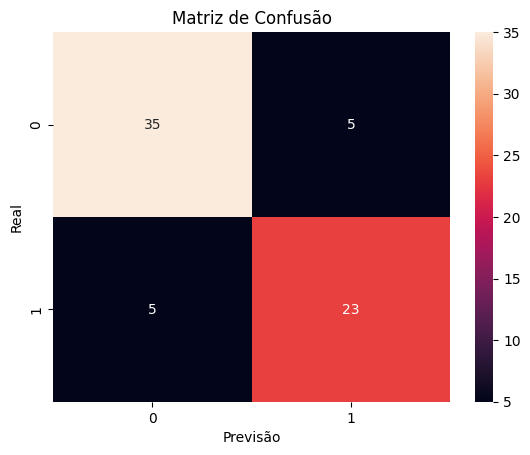

In [ ]:
# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, previsoes)

# Plotar a matriz de confusão
sns.heatmap(matriz_confusao, annot=True, fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()
